In [35]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# What if we want to predict car price using more than one variable?

# If we want to use more variables in our model to predict car price, 
# we can use Multiple Linear Regression. Multiple Linear Regression is very similar to 
# Simple Linear Regression, but this method is used to explain the relationship 
# between one continuous response (dependent) variable 
# and two or more predictor (independent) variables. 
# Most of the real-world regression models involve multiple predictors. 
# We will illustrate the structure by using four predictor variables, 
# but these results can generalize to any integer:

# The equation is given by:

# Yhat = a + b1x_1 + b2x_2 + b3x_3 + b4x_4

# From the previous section we know that other good predictors of price could be:

# Horsepower
# Curb-weight
# Engine-size
# Highway-mpg

# Let's develop a model using these variables as the predictor variables.

In [37]:
# load de dataframe
# raw_dataset = pd.read_csv("../data/clean_df.csv")
raw_dataset = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")

# select objetives columns
raw_dataset = raw_dataset.loc[:, ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'price']]
# copy dataset
dataset = raw_dataset.copy()
# clean nan values
dataset = dataset.dropna()
# sample train dataset
train_dataset = dataset.sample(frac=0.8, random_state=1)
# sample test dataset
test_dataset = dataset.drop(train_dataset.index)

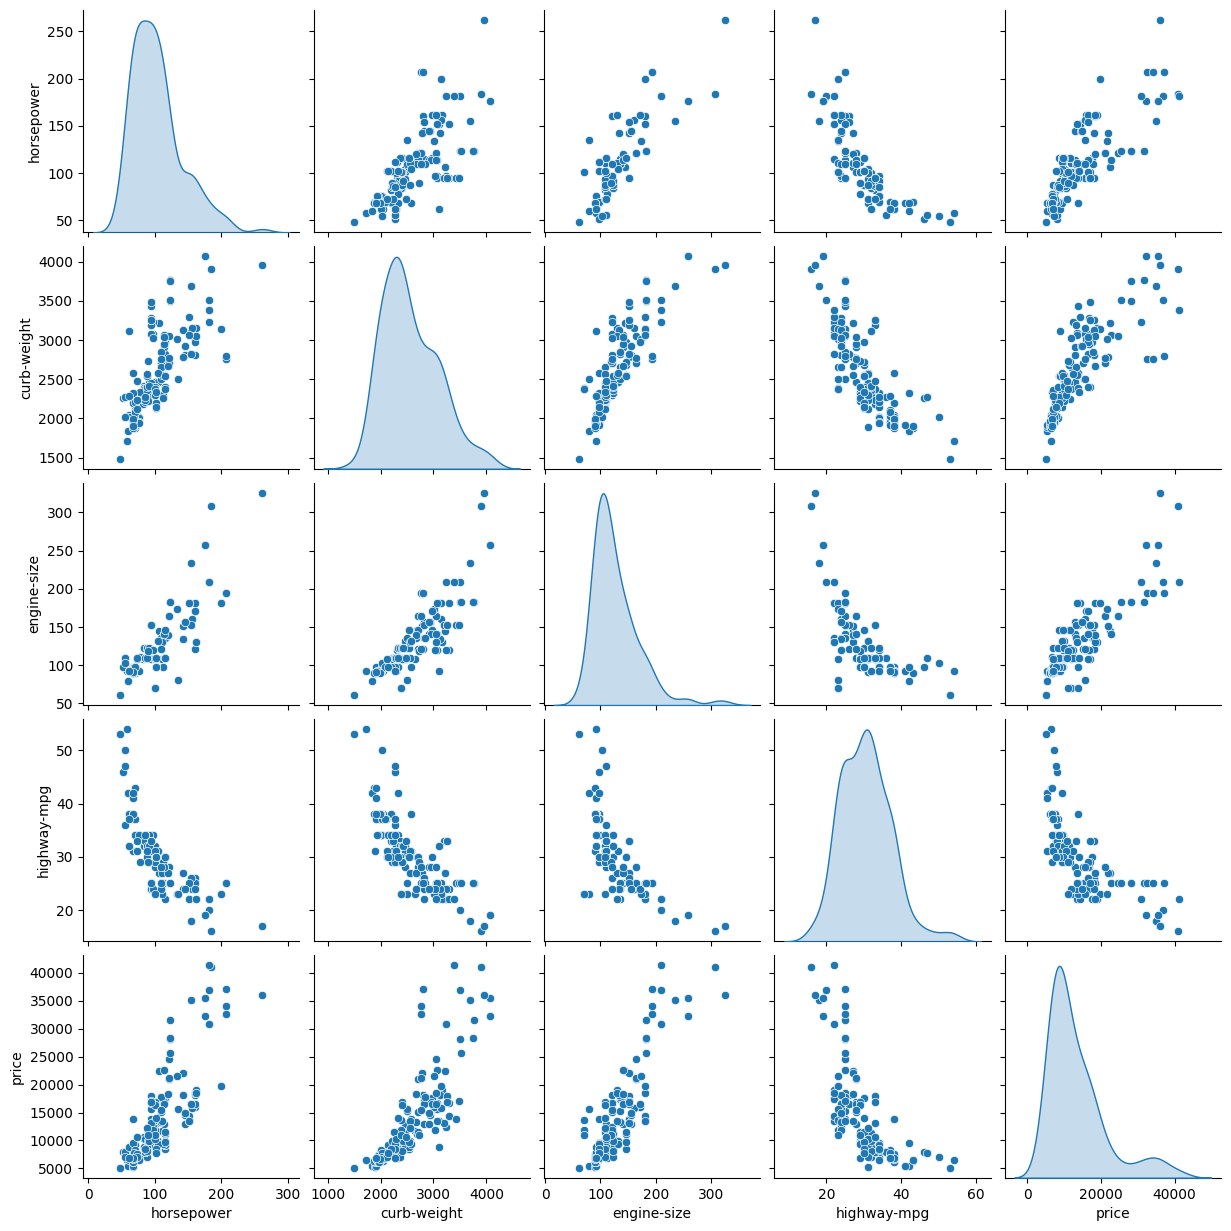

In [38]:
# features (independent variables)
train_features = train_dataset.copy()
test_features = test_dataset.copy()
# labels (dependet variable)
train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

sns.pairplot(train_dataset[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'price']], diag_kind='kde')

In [39]:
regr = linear_model.LinearRegression()
regr.fit(train_features, train_labels)
price_pred = regr.predict(test_features)

print("Coefficients Yhat = a + bX:")
print(f"intercept (a): {round(regr.intercept_, 2)}")
print(f"slope (b): {regr.coef_}")

Coefficients Yhat = a + bX:
intercept (a): -18027.12
slope (b): [75.23231582  5.23395657 60.45155374 81.20077848]


Text(0, 0.5, 'Count')

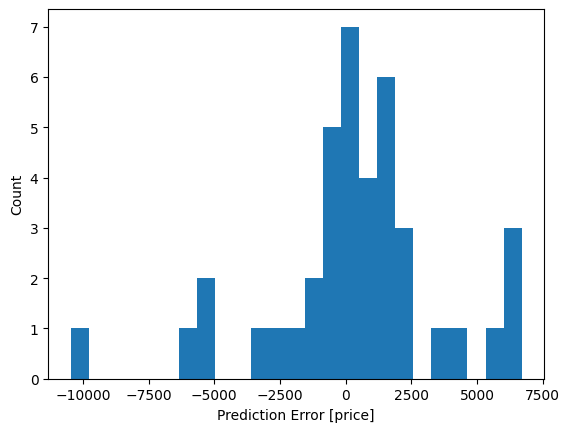

In [40]:
error = price_pred - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [price]")
plt.ylabel("Count")

(0.0, 48176.81498684834)

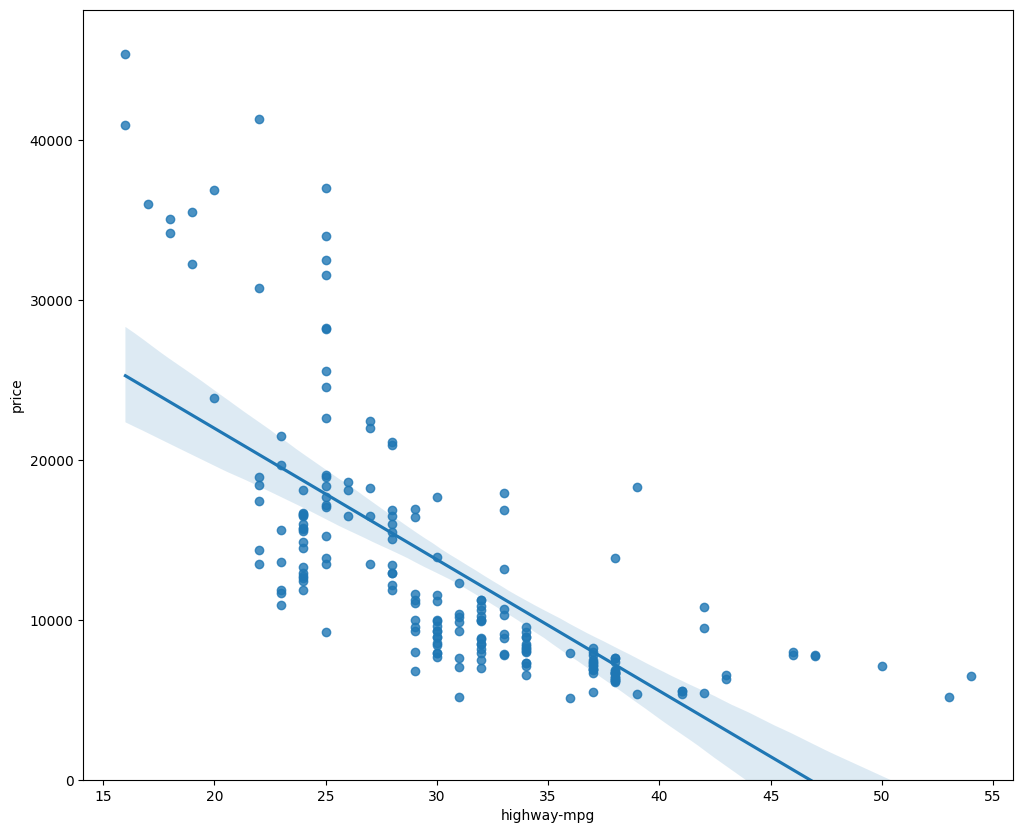

In [41]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=raw_dataset)
plt.ylim(0,)

<Axes: ylabel='Density'>

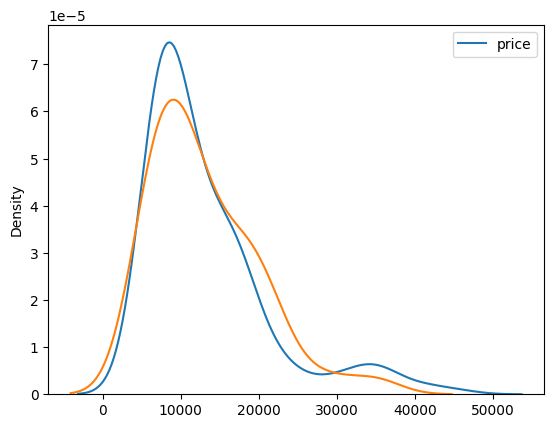

In [42]:
ax1 = sns.kdeplot(raw_dataset[["price"]], label="Actual Value") # yellow
sns.kdeplot(price_pred, label="Fitted Values", ax=ax1)